## Import libraries

In [1]:
# generic tools
import numpy as np
import datetime 

# tools from sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

# Load the TensorBoard notebook extension
#%load_ext tensorboard
# delete logs from previous runs - not always safe!
#!rm -rf ./logs/

Matplotlib is building the font cache; this may take a moment.


## Download data, train-test split, binarize labels

In [2]:
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# to data, normalise data
data = data.astype("float")/255.0

# split data
(trainX, testX, trainY, testY) = train_test_split(data, 
                                                  labels, 
                                                  test_size=0.2)

# convert labels to one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

## Define neural network architecture using ```tf.keras```

In [11]:
# define architecture 784x256x128x1

# initialising network, sequential (feed-forward)
model = Sequential()
# adding layer 1: Dense (= fully connected layer), 256 input nodes, and sigmoid activation function
model.add(Dense(256, input_shape=(784,), activation="relu"))
# adding layer 2: fully connected layer with 128 nodes
model.add(Dense(128, activation="relu"))
# adding layer 3: fully connected layer with 10 nodes, softmax activation: for classification
model.add(Dense(10, activation="softmax")) # generalisation of logistic regression for multiclass task

## Show summary of model architecture

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

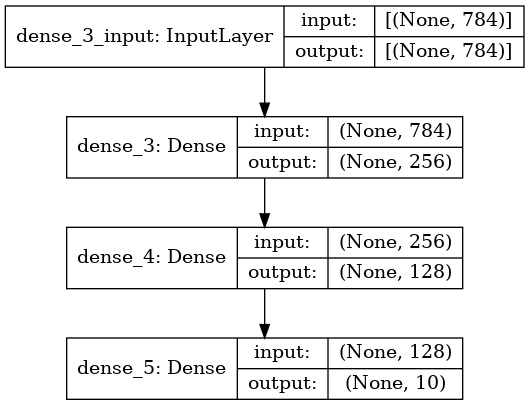

In [13]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Compile model loss function, optimizer, and preferred metrics

In [14]:
# train model using SGD
# sgd: statistic gradient descrent, 0.01 = learning rate (how far it moves)
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", 
              optimizer=sgd, 
              metrics=["accuracy"])

## Set ```tensorboard``` parameters - not compulsory!

In [7]:
# creating folder for datte and time to save model outputs
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
#                                                      histogram_freq=1)

## Train model and save history

In [15]:
history = model.fit(trainX, trainY, 
                    validation_data=(testX,testY), 
                    epochs=100, 
                    batch_size=128)
                    #callbacks=[tensorboard_callback])

Epoch 1/100
438/438 [==============================] - 5s 12ms/step - loss: 1.6826 - accuracy: 0.5267 - val_loss: 0.6111 - val_accuracy: 0.8506
Epoch 2/100
438/438 [==============================] - 4s 10ms/step - loss: 0.5513 - accuracy: 0.8628 - val_loss: 0.4207 - val_accuracy: 0.8883
Epoch 3/100
438/438 [==============================] - 5s 10ms/step - loss: 0.4049 - accuracy: 0.8900 - val_loss: 0.3596 - val_accuracy: 0.9019
Epoch 4/100
438/438 [==============================] - 4s 10ms/step - loss: 0.3504 - accuracy: 0.9017 - val_loss: 0.3251 - val_accuracy: 0.9117
Epoch 5/100
438/438 [==============================] - 5s 11ms/step - loss: 0.3153 - accuracy: 0.9134 - val_loss: 0.3037 - val_accuracy: 0.9172
Epoch 6/100
438/438 [==============================] - 5s 12ms/step - loss: 0.2886 - accuracy: 0.9192 - val_loss: 0.2867 - val_accuracy: 0.9214
Epoch 7/100
438/438 [==============================] - 5s 10ms/step - loss: 0.2774 - accuracy: 0.9219 - val_loss: 0.2712 - val_accuracy:

## Visualise using ```matplotlib```

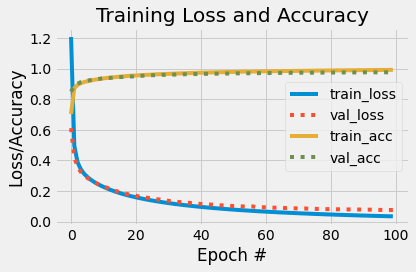

In [16]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 100), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Inspect using ```tensorboard```

This won't run on JupyterHub!

In [ ]:
#%tensorboard --logdir logs/fit

## Classifier metrics

In [17]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1384
           1       0.98      0.99      0.98      1618
           2       0.97      0.98      0.98      1384
           3       0.97      0.97      0.97      1456
           4       0.98      0.98      0.98      1355
           5       0.98      0.97      0.97      1255
           6       0.98      0.98      0.98      1383
           7       0.98      0.98      0.98      1429
           8       0.97      0.96      0.97      1341
           9       0.97      0.97      0.97      1395

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



# Cifar10 Data

In [25]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [26]:
# normalising data
x_train = x_train.astype("float")/255.0
x_test = x_test.astype("float")/255.0

In [39]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [40]:
# flattening data 
x_train_flat = x_train.flatten().reshape(50000, 3072)
x_test_flat = x_test.flatten().reshape(10000, 3072)

In [41]:
# binarize labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [46]:
# initialise model
# flatten image numpy reshape or flatten
# 3072 -> 1024 -> 512  -> 10
# initialising network, sequential (feed-forward)
model = Sequential()
# adding layer 1: Dense (= fully connected layer), 256 input nodes, and sigmoid activation function
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
# adding layer 2: fully connected layer with 128 nodes
model.add(Dense(512, activation="relu"))
# adding layer 3: fully connected layer with 10 nodes, softmax activation: for classification
model.add(Dense(10, activation="softmax")) # generalisation of logistic regression for multiclass task

In [47]:
# compiling
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", 
              optimizer=sgd, 
              metrics=["accuracy"])

In [52]:
# train model
history = model.fit(x_train_flat, y_train, 
                    validation_data=(x_test_flat,y_test), 
                    epochs=100, 
                    batch_size=128)

Epoch 1/100
391/391 [==============================] - 33s 84ms/step - loss: 1.0378 - accuracy: 0.6416 - val_loss: 1.3459 - val_accuracy: 0.5227
Epoch 2/100
391/391 [==============================] - 31s 78ms/step - loss: 1.0279 - accuracy: 0.6432 - val_loss: 1.4332 - val_accuracy: 0.4956
Epoch 3/100
391/391 [==============================] - 32s 81ms/step - loss: 1.0190 - accuracy: 0.6491 - val_loss: 1.3934 - val_accuracy: 0.5126
Epoch 4/100
391/391 [==============================] - 33s 83ms/step - loss: 1.0140 - accuracy: 0.6507 - val_loss: 1.2830 - val_accuracy: 0.5553
Epoch 5/100
391/391 [==============================] - 32s 81ms/step - loss: 1.0037 - accuracy: 0.6527 - val_loss: 1.3171 - val_accuracy: 0.5350
Epoch 6/100
391/391 [==============================] - 34s 86ms/step - loss: 0.9957 - accuracy: 0.6574 - val_loss: 1.3421 - val_accuracy: 0.5273
Epoch 7/100
391/391 [==============================] - 34s 86ms/step - loss: 0.9819 - accuracy: 0.6643 - val_loss: 1.3428 - val_ac

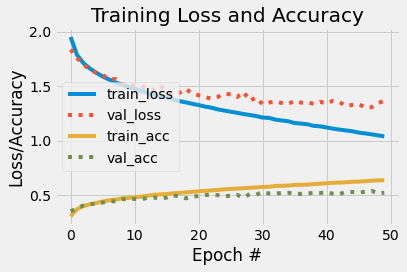

In [50]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 50), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 50), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

In [51]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(x_test_flat, batch_size=128)
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      1000
           1       0.65      0.69      0.67      1000
           2       0.38      0.54      0.44      1000
           3       0.45      0.17      0.25      1000
           4       0.68      0.21      0.32      1000
           5       0.35      0.64      0.45      1000
           6       0.69      0.47      0.56      1000
           7       0.47      0.74      0.57      1000
           8       0.76      0.56      0.65      1000
           9       0.61      0.57      0.59      1000

    accuracy                           0.52     10000
   macro avg       0.56      0.52      0.51     10000
weighted avg       0.56      0.52      0.51     10000

